In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyquaternion import Quaternion

In [9]:
from scipy.signal import find_peaks

In [10]:
plt.rcParams['figure.figsize'] = [15, 8]

In [11]:
folder = "./2021_05_28_11_28_46"

In [12]:
imufile = folder + "/gyro_accel.csv"
viconfile = folder + "/vicon_capture_quaternion.csv"
# viconfile = folder + "/vicon_capture_helical.csv"

In [13]:
imu_data = pd.read_csv(imufile)

In [14]:
vicon_data = pd.read_csv(viconfile)

## IMU data description
- Timestamp  nanosec
- gx/gy/gz   rad/s
- ax/ay/az   m/s^2

In [15]:
imu_data.head()

,Timestamp,gx,gy,gz,ax,ay,az
0,844249521038353,-0.135612,0.254120,-0.094073,-0.040701,-0.153229,10.232818
1,844249526043199,-0.108734,0.260229,-0.098960,-0.158017,-0.114922,10.254366
2,844249531048122,-0.081856,0.257174,-0.098349,-0.294487,-0.095768,10.316615
3,844249536073353,-0.054978,0.244957,-0.097128,-0.435745,-0.057461,10.366894
4,844249541713045,-0.031154,0.227242,-0.091630,-0.497994,-0.026336,10.362105


In [16]:
imu_data.describe()

,Timestamp,gx,gy,gz,ax,ay,az
count,2.550290e+05,255029.000000,255029.000000,255029.000000,255029.000000,255029.000000,255029.000000
mean,8.448871e+14,0.001428,0.000137,0.005076,-0.232639,1.347224,9.204053
std,3.681034e+11,0.143543,0.183023,0.125269,2.471943,1.384170,1.304957
min,8.442495e+14,-4.802011,-2.994461,-2.003638,-10.158598,-10.879252,-15.437813
25%,8.445683e+14,-0.043982,-0.064141,-0.039095,-0.732626,0.474052,8.901642
50%,8.448871e+14,-0.000611,0.000611,0.001222,-0.296881,0.866701,9.461885
75%,8.452059e+14,0.043982,0.065973,0.042150,0.169988,1.572990,9.763555
max,8.455247e+14,3.587612,3.223536,1.902845,16.687586,9.751583,55.021150


## Vicon data description

- RX/RY/RZ/RW  quaternion
- TX/TY/TZ     mm

In [17]:
vicon_data.head()

,Frame,Sub Frame,RX,RY,RZ,RW,TX,TY,TZ
0,1,0.0,0.020650,0.018019,-0.571104,0.820420,-2799.33,-2146.67,922.873
1,2,0.0,0.021085,0.017865,-0.571413,0.820197,-2799.36,-2147.06,922.826
2,3,0.0,0.021222,0.017967,-0.571513,0.820122,-2799.42,-2147.04,922.701
3,4,0.0,0.021326,0.017678,-0.571810,0.819919,-2799.48,-2147.10,922.779
4,5,0.0,0.022033,0.017701,-0.571281,0.820267,-2799.66,-2146.53,922.742


In [18]:
vicon_data.describe()

,Frame,Sub Frame,RX,RY,RZ,RW,TX,TY,TZ
count,127511.000000,127510.0,127510.000000,127510.000000,127510.000000,127510.000000,127510.000000,127510.000000,127510.000000
mean,63756.000000,0.0,0.063246,0.002637,0.009645,0.956945,-27.273067,-97.174517,183.588591
std,36809.399425,0.0,0.072203,0.129941,0.142806,0.194074,454.744251,325.041372,148.751220
min,1.000000,0.0,-0.270696,-0.435775,-0.774578,-0.737588,-2813.600000,-2285.990000,59.724700
25%,31878.500000,0.0,0.017330,-0.013032,-0.011582,0.978229,-22.832200,-68.269475,139.097000
50%,63756.000000,0.0,0.038514,0.005727,0.000115,0.997146,48.611000,-27.868800,155.894000
75%,95633.500000,0.0,0.073336,0.024036,0.013241,0.999179,122.850000,-16.737975,171.888750
max,127511.000000,0.0,0.351206,0.467075,0.998710,0.999998,506.403000,119.088000,1398.090000


## Timestamp alignment

### IMU Start

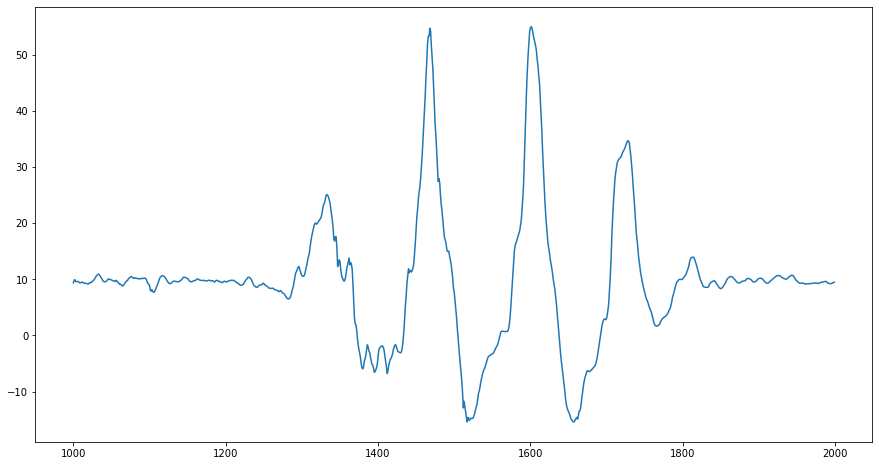

In [19]:
plt.plot(imu_data['az'][1000:2000])

In [20]:
find_peaks(imu_data['az'][1000:2000], height=30, width = 10)

(array([468, 601, 728]),
 {'peak_heights': array([54.741028, 55.02115 , 34.691982]),
  'prominences': array([61.5357725, 70.454174 , 33.0471655]),
  'left_bases': array([412, 517, 657]),
  'right_bases': array([517, 657, 766]),
  'widths': array([29.79607992, 33.79606693, 32.04680215]),
  'width_heights': array([23.97314175, 19.794063  , 18.16839925]),
  'left_ips': array([452.76606697, 587.23407219, 707.08646291]),
  'right_ips': array([482.56214689, 621.03013912, 739.13326506])})

### IMU End

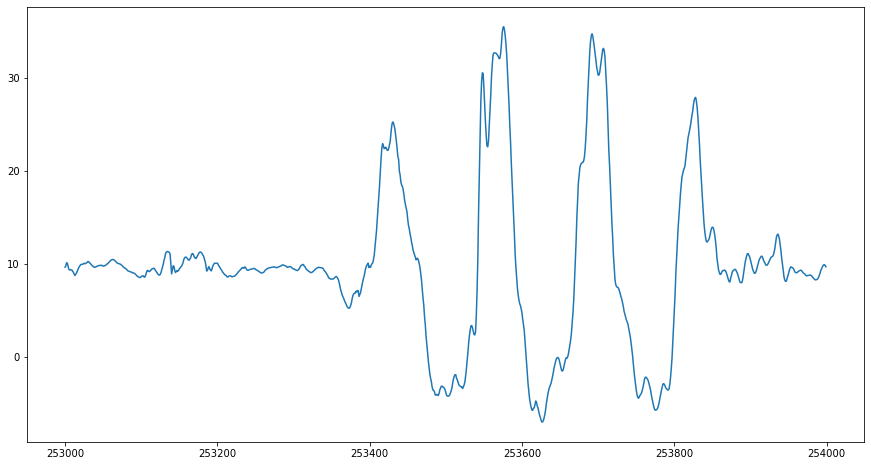

In [21]:
plt.plot(imu_data['az'][253000:254000])

In [22]:
find_peaks(imu_data['az'][253000:254000], height=26, width = 10)

(array([576, 692, 828]),
 {'peak_heights': array([35.515587, 34.75184 , 27.918785]),
  'prominences': array([39.717411 , 40.4524344, 19.92694  ]),
  'left_bases': array([503, 626, 775]),
  'right_bases': array([626, 775, 888]),
  'widths': array([45.707518  , 46.13693866, 27.77575451]),
  'width_heights': array([15.6568815, 14.5256228, 17.955315 ]),
  'left_ips': array([543.0031072 , 671.83271418, 808.44053353]),
  'right_ips': array([588.7106252 , 717.96965285, 836.21628804])})

In [23]:
find_peaks(imu_data['az'], height=26, width = 10)

(array([  1468,   1601,   1728, 253576, 253692, 253828]),
 {'peak_heights': array([54.741028, 55.02115 , 34.691982, 35.515587, 34.75184 , 27.918785]),
  'prominences': array([61.5357725, 70.454174 , 38.893806 , 42.4898964, 40.4524344,
         20.300435 ]),
  'left_bases': array([  1412,   1517,   1657,   1657, 253626, 253775]),
  'right_bases': array([  1517,   1657, 253503, 253626, 253775, 254009]),
  'widths': array([29.79607992, 33.79606693, 34.95678459, 46.70824053, 46.13693866,
         28.1016766 ]),
  'width_heights': array([23.97314175, 19.794063  , 15.245079  , 14.2706388 , 14.5256228 ,
         17.7685675 ]),
  'left_ips': array([  1452.76606697,   1587.23407219,   1706.35096408, 253542.73163303,
         253671.83271418, 253808.25121374]),
  'right_ips': array([  1482.56214689,   1621.03013912,   1741.30774867, 253589.43987356,
         253717.96965285, 253836.35289034])})

The three anchor points in vicon starting jumps are:

- 1468
- 1601
- 1728
- 253576
- 253692
- 253828

### Vicon Start

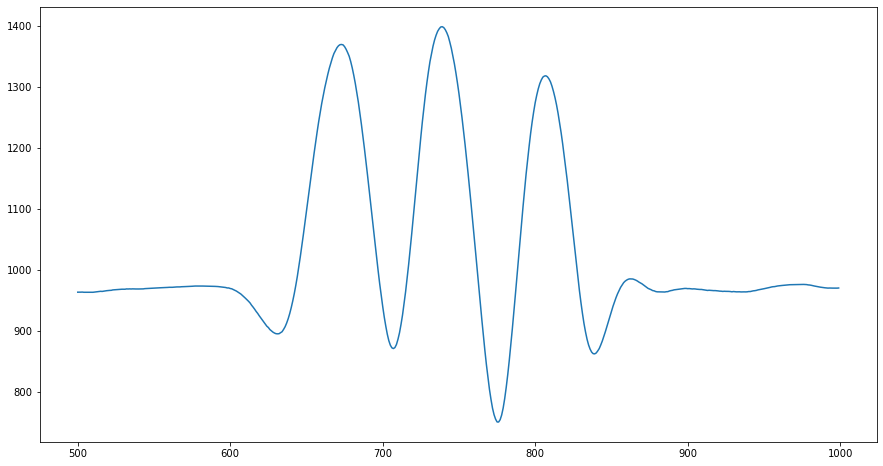

In [24]:
plt.plot(vicon_data['TZ'][500:1000])

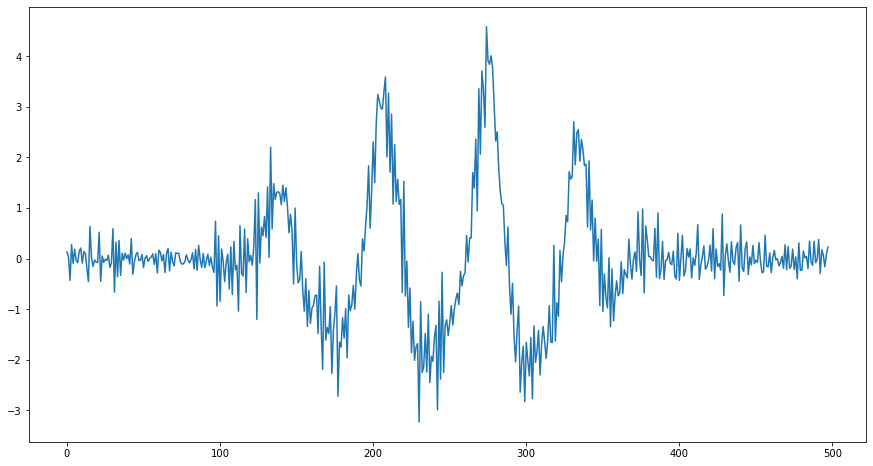

In [25]:
y_grad = np.diff(vicon_data['TZ'][500:1000], 2)
plt.plot(y_grad)

In [26]:
find_peaks(-vicon_data['TZ'][500:1000], height=-900, width = 10)

(array([131, 207, 276, 339]),
 {'peak_heights': array([-895.067, -870.916, -750.6  , -862.233]),
  'prominences': array([ 78.294, 498.024, 567.08 , 122.823]),
  'left_bases': array([ 81, 173, 239, 307]),
  'right_bases': array([173, 239, 307, 362]),
  'widths': array([23.30057743, 29.70871381, 28.88114528, 17.69418103]),
  'width_heights': array([ -934.214 , -1119.928 , -1034.14  ,  -923.6445]),
  'left_ips': array([116.32376609, 191.60857014, 260.70442804, 331.27657954]),
  'right_ips': array([139.62434353, 221.31728395, 289.58557332, 348.97076057])})

In [27]:
find_peaks(y_grad, height=1, width = 10)

(array([133, 208, 274, 331]),
 {'peak_heights': array([2.204, 3.592, 4.585, 2.707]),
  'prominences': array([3.404, 6.312, 7.415, 4.05 ]),
  'left_bases': array([124, 177, 230, 299]),
  'right_bases': array([177, 230, 299, 355]),
  'widths': array([14.82716516, 23.80431845, 20.88468907, 14.28417468]),
  'width_heights': array([0.502 , 0.436 , 0.8775, 0.682 ]),
  'left_ips': array([132.21854913, 194.59459459, 264.36113266, 325.66920152]),
  'right_ips': array([147.04571429, 218.39891304, 285.24582173, 339.95337621])})

To think about this physically:

The experimenter takes the phone and jumps 3 times. Each time, at the lowest point, the legs are yet to reach maximum strength. It's only after a while that the muscle will be in full tension. So there should be a slight delay in max acceleration relative to lowest point. 

As demonstrated here, the peaks of TZ's 2nd-derivative are slightly later than valleys of TZ.

The three anchor points in vicon starting jumps are:

- 708
- 774
- 831

### Vicon End

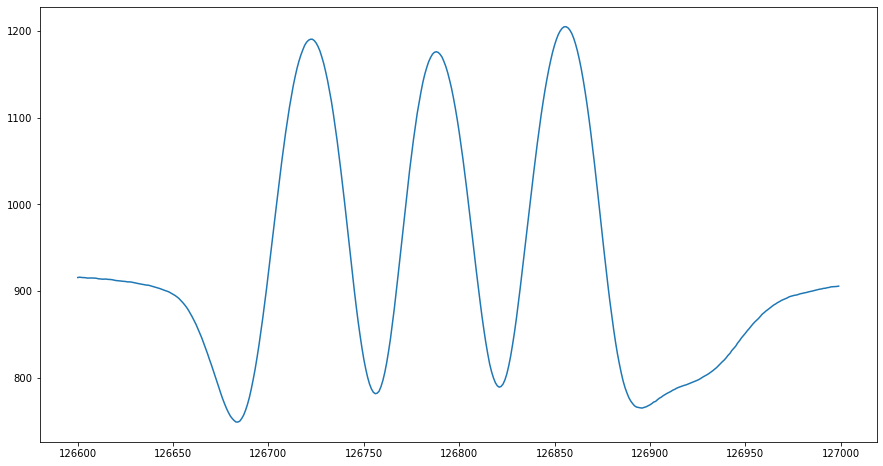

In [28]:
plt.plot(vicon_data['TZ'][126600:127000])

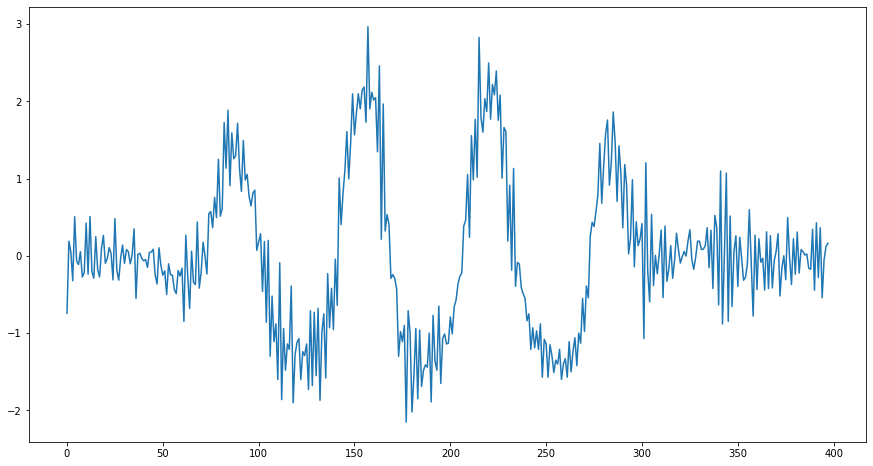

In [29]:
y_grad = np.diff(vicon_data['TZ'][126600:127000], 2)
plt.plot(y_grad)

In [30]:
find_peaks(y_grad, height=1, width = 10)

(array([ 84, 157, 215, 285]),
 {'peak_heights': array([1.884, 2.965, 2.826, 1.862]),
  'prominences': array([2.732, 4.865, 4.426, 2.931]),
  'left_bases': array([ 61, 118, 177, 258]),
  'right_bases': array([118, 177, 258, 301]),
  'widths': array([18.37516701, 20.5338871 , 19.41896309, 14.86768414]),
  'width_heights': array([0.518 , 0.5325, 0.613 , 0.3965]),
  'left_ips': array([ 80.05102041, 143.3245614 , 210.28343465, 275.08418367]),
  'right_ips': array([ 98.42618742, 163.85844851, 229.70239774, 289.95186782])})

- 126757
- 126815
- 126885

## Fit

In [31]:
imu_frames = [  1468,   1601,   1728, 253576, 253692, 253828]

In [32]:
vicon_frames = [ 708, 774, 831, 126757, 126815, 126885]

In [33]:
imu_frames = np.array(imu_frames).reshape(-1, 1)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
regressor = LinearRegression().fit(imu_frames, vicon_frames)

In [36]:
regressor.coef_

array([0.49999272])

In [37]:
regressor.intercept_

-28.4875081998689

## Align

In [38]:
imu_start = 3000
imu_end = 253000

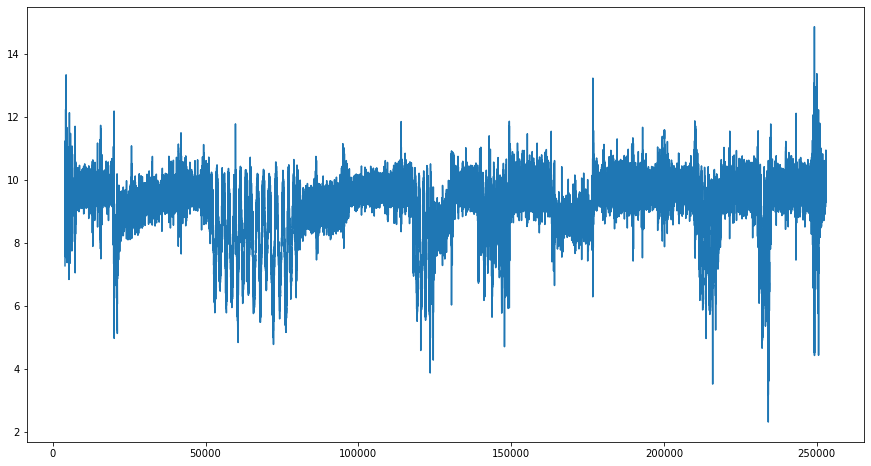

In [39]:
plt.plot(imu_data['az'][4000:253000])

In [40]:
regressor.predict([[4000]])

array([1971.48337572])

In [41]:
regressor.predict([[252000]])

array([125969.67817865])

In [42]:
vicon_start = 1970
vicon_end = 125970

In [115]:
imu_excerpt = imu_data[:][4000:252000].reset_index()

In [116]:
imu_excerpt

,index,Timestamp,gx,gy,gz,ax,ay,az
0,4000,844269521071842,-0.225409,0.950506,0.973719,-0.172383,2.044648,7.266402
1,4001,844269526076689,-0.277333,0.979828,0.990213,-0.486023,2.066196,7.426814
2,4002,844269531081689,-0.329256,0.995710,1.010982,-0.924162,1.996764,7.613562
3,4003,844269536106535,-0.399506,0.989602,1.051910,-1.110910,1.951274,7.948749
4,4004,844269541746535,-0.417221,0.981050,1.065349,-1.319205,1.817199,8.092401
...,...,...,...,...,...,...,...,...
247995,251995,845509496107818,-0.023213,0.042150,0.054978,-0.311246,-0.713472,9.835381
247996,251996,845509501442280,-0.026267,0.029322,0.054367,-0.263362,-0.730232,9.811439
247997,251997,845509506096972,-0.029932,0.017104,0.050091,-0.208296,-0.756568,9.773131
247998,251998,845509511071510,-0.034208,0.006720,0.047647,-0.155623,-0.770933,9.742006


In [117]:
vicon_excerpt = vicon_data[:][1970:125970].reset_index()

In [118]:
vicon_excerpt

,index,Frame,Sub Frame,RX,RY,RZ,RW,TX,TY,TZ
0,1970,1971,0.0,0.093999,0.007543,0.150478,0.984105,317.877,-166.396,435.397
1,1971,1972,0.0,0.092990,0.010755,0.155454,0.983398,320.829,-169.853,435.712
2,1972,1973,0.0,0.092161,0.014479,0.160175,0.982670,323.792,-173.393,435.752
3,1973,1974,0.0,0.090918,0.017863,0.165368,0.981870,326.918,-176.802,435.848
4,1974,1975,0.0,0.089191,0.021881,0.170473,0.981073,330.065,-180.163,435.711
...,...,...,...,...,...,...,...,...,...,...
123995,125965,125966,0.0,0.000823,-0.054109,0.841538,-0.537481,-2609.210,-2007.350,873.914
123996,125966,125967,0.0,0.000632,-0.054903,0.841605,-0.537296,-2609.260,-2007.300,873.818
123997,125967,125968,0.0,-0.000546,-0.054935,0.841473,-0.537499,-2609.410,-2007.110,873.894
123998,125968,125969,0.0,0.000525,-0.055588,0.841602,-0.537230,-2609.730,-2006.690,874.339


In [119]:
vicon_excerpt = np.array(vicon_excerpt)

In [120]:
imu_excerpt = np.array(imu_excerpt)

In [121]:
# change vicon data from (x, y, z, w) to (w, x, y, z)
rx = vicon_excerpt[:, 3].copy()
ry = vicon_excerpt[:, 4].copy()
rz = vicon_excerpt[:, 5].copy()
rw = vicon_excerpt[:, 6].copy()
vicon_excerpt[:, 3] = rw
vicon_excerpt[:, 4] = rx
vicon_excerpt[:, 5] = ry
vicon_excerpt[:, 6] = rz

## Subtract Gravity

In [122]:
vicon_excerpt[1][3:7]

array([0.983398 , 0.0929901, 0.0107555, 0.155454 ])

In [123]:
gravity = np.array([0,0,9.8])
for i in range(124000):
    q = Quaternion(vicon_excerpt[i][3:7])
    gravity_r = q.conjugate.rotate(gravity)
    imu_excerpt[2*i][5:8] = imu_excerpt[2*i][5:8] - gravity_r
    imu_excerpt[2*i+1][5:8] = imu_excerpt[2*i+1][5:8] - gravity_r

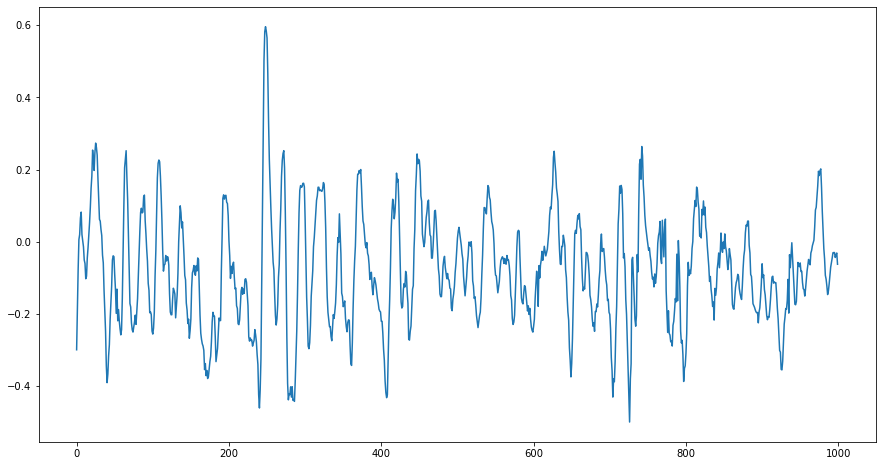

In [135]:
plt.plot(imu_excerpt[50000:51000,5])

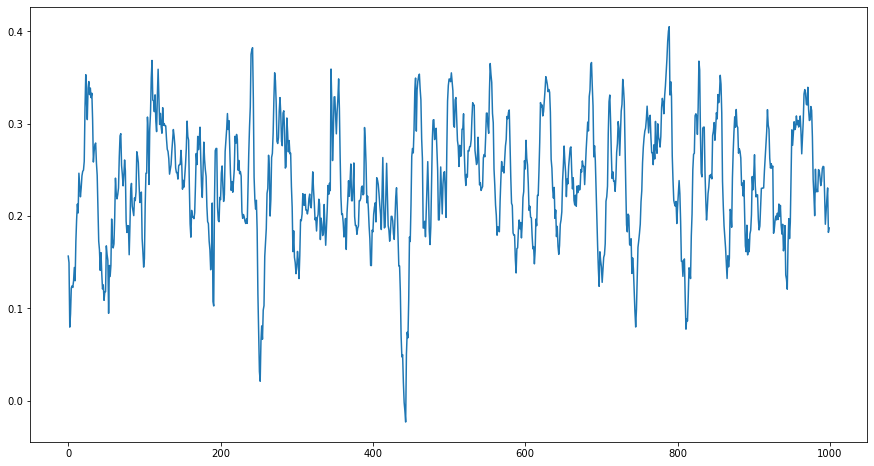

In [136]:
plt.plot(imu_excerpt[50000:51000,6])

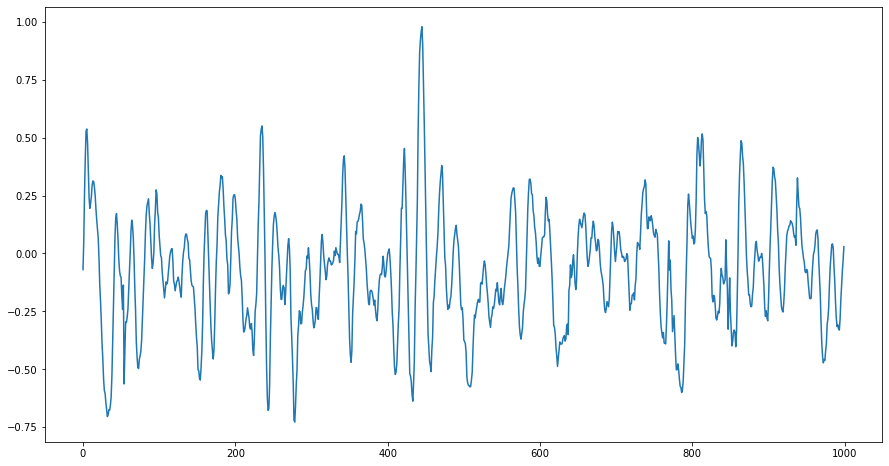

In [137]:
plt.plot(imu_excerpt[50000:51000,7])

## Create Data in Stride

In [127]:
# length of imu training data sequence
dl = 50
# interval of vicon sequence
di = int(dl/2)
# stride of imu training data sequence
dt = 10
# stride of vicon sequence
ds = int(dt/2)
# length of data
len_m = int((imu_excerpt.shape[0] - dl) / dt)

In [128]:
len_m

24795

In [142]:
data_x = np.zeros((len_m, dl*12))
data_y = np.zeros((len_m, 7))
data_gt = np.zeros((len_m, 7))

In [130]:
data_x.shape

(24795, 300)

In [131]:
from pyquaternion import Quaternion

In [132]:
def get_rotation(a, b):
    a = Quaternion(a)
    b = Quaternion(b)
    rotation = a.inverse * b # a * rotation = b
    return rotation.elements

In [138]:
from scipy import integrate

In [139]:
def fill_integrate(a):
    a[:,6] = integrate.cumtrapz(a[:,3], initial=0)
    a[:,7] = integrate.cumtrapz(a[:,4], initial=0)
    a[:,8] = integrate.cumtrapz(a[:,5], initial=0)
    a[:,9] = integrate.cumtrapz(a[:,6], initial=0)
    a[:,10] = integrate.cumtrapz(a[:,7], initial=0)
    a[:,11] = integrate.cumtrapz(a[:,8], initial=0)

In [143]:
for i in range(len_m):
    start_imu = i * dt
    end_imu = start_imu + dl
    start_vicon = i * ds
    end_vicon = start_vicon + di
    imu_tmp = np.zeros((dl, 12))
    imu_tmp[:,:6] = imu_excerpt[start_imu:end_imu,2:8].copy()
    fill_integrate(imu_tmp)
    data_x[i] = imu_tmp.reshape(dl*12)
    data_y[i][0:4] = get_rotation(vicon_excerpt[start_vicon][3:7], 
                                  vicon_excerpt[end_vicon][3:7]) # start * rotation = end
    init_rotation = Quaternion(vicon_excerpt[start_vicon][3:7])
    data_y[i][4:7] = init_rotation.rotate(vicon_excerpt[end_vicon][7:10] - vicon_excerpt[start_vicon][7:10])
    data_gt[i][0:4] = vicon_excerpt[start_vicon][3:7]
    data_gt[i][4:7] = vicon_excerpt[start_vicon][7:10]

In [146]:
np.savetxt('x_50_10_2_int.csv', data_x, delimiter=",")

In [72]:
np.savetxt('y_50_5_2.csv', data_y, delimiter=",")

In [73]:
np.savetxt('gt_50_5_2.csv', data_gt, delimiter=",")

In [112]:
vicon_excerpt[0][3:7]

array([0.984105  , 0.093999  , 0.00754338, 0.150478  ])

In [369]:
vicon_excerpt[:, 3]

array([0.998772, 0.998793, 0.998814, ..., 0.995046, 0.994954, 0.994861])

## Verification

In [381]:
len_draw = 30
start_seed = 0
traj_interval = dl//dt

In [413]:
draw_gt = np.zeros((len_draw+1, 3))
draw_y = np.zeros((len_draw+1, 3))
draw_dy = np.zeros((len_draw, 3))
draw_r = []

In [390]:
# draw trajectory from gt
for i in range(len_draw+1):
    i_data = start_seed + i * traj_interval
    draw_gt[i] = data_gt[i_data][4:7] - data_gt[start_seed][4:7]

In [414]:
# draw trajectory from y
draw_r.append(Quaternion(data_gt[start_seed][0:4]))
# draw_r.append(Quaternion([ 0.0459366,  0.0136608, -0.0125507,  0.998772 ]))
# draw_r.append(Quaternion([1,0,0,0]))
for i_draw, i_data in enumerate(range(start_seed, start_seed + len_draw * traj_interval, traj_interval)):
    draw_r.append(draw_r[i_draw] * Quaternion(data_y[i_data][0:4]))
    draw_y[i_draw+1] = draw_y[i_draw] + draw_r[i_draw].inverse.rotate(data_y[i_data][4:7])

In [412]:
data_gt[0][0:4]

array([ 0.998772 ,  0.0459366,  0.0136608, -0.0125507])

In [411]:
draw_r[0]

Quaternion(1.0, 0.0, 0.0, 0.0)

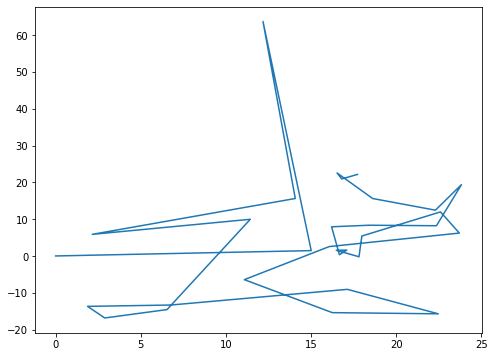

In [391]:
plt.plot(draw_gt[:,1], draw_gt[:,2])

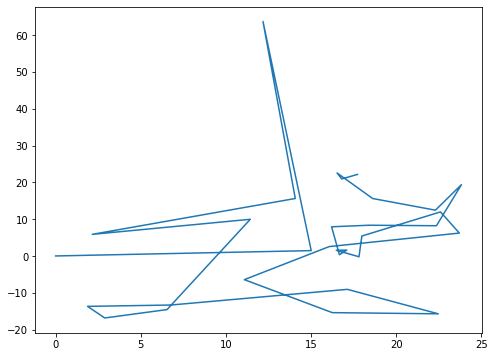

In [415]:
plt.plot(draw_y[:,1], draw_y[:,2])

In [408]:
draw_y[1]

array([20.71030625, 14.32404853,  2.24031979])

In [409]:
draw_gt[1]

array([20.2912, 15.0091,  1.452 ])

## Quaternion Test

In [298]:
q = Quaternion(0.5, 0.5, 0.5, 0.5)

In [327]:
q2 = q * q

In [325]:
q.rotate(q.rotate((1, 0, 0)))

(0.0, 0.0, 1.0)

In [328]:
q2.rotate((1, 0, 0))

(0.0, 0.0, 1.0)

In [329]:
q.inverse * q2

Quaternion(0.5, 0.5, 0.5, 0.5)

In [304]:
q.elements

array([0.5, 0.5, 0.5, 0.5])

In [392]:
data_gt[0]

array([ 9.98772e-01,  4.59366e-02,  1.36608e-02, -1.25507e-02,
        2.41740e+01, -2.95222e+01,  1.97188e+02])

In [394]:
data_gt[20]

array([ 9.98583e-01,  5.20390e-02,  9.03356e-03,  6.43505e-03,
        4.44652e+01, -1.45131e+01,  1.98640e+02])

In [397]:
rotation_gt = get_rotation(data_gt[0][0:4], data_gt[20][0:4])

In [399]:
translation_gt = data_gt[20][4:7] - data_gt[0][4:7]

In [405]:
translation_gt

array([20.2912, 15.0091,  1.452 ])

In [401]:
translation_y = Quaternion(data_gt[0][0:4]).rotate(translation_gt)

In [402]:
translation_y

array([20.71030625, 14.32404853,  2.24031979])

In [406]:
Quaternion(data_gt[0][0:4]).inverse.rotate(translation_y)

array([20.2912, 15.0091,  1.452 ])

In [252]:
np.array(imu_excerpt[['gx','gy','gz','ax','ay','az']][start_imu:end_imu]).reshape(dl*6).reshape(6,200)

array([[-8.55211400e-03,  4.09279730e-02, -4.27605700e-03, ...,
         9.70848750e+00, -1.22173050e-03, -2.44346100e-03],
       [ 4.21497000e-02, -8.11634360e-01,  6.41646000e-01, ...,
        -4.64257600e-02,  1.01403630e-01, -6.36857600e-01],
       [ 7.35019900e-01,  1.02854900e+01,  1.34390350e-02, ...,
        -9.02614060e-01,  8.21211160e-01,  9.98860900e+00],
       [ 1.22783914e-01, -1.19729586e-01, -3.66519160e-03, ...,
         9.11472600e+00,  2.50454750e-02, -2.05250730e-01],
       [ 1.16064400e-02, -5.07570740e-01,  9.88805300e-01, ...,
        -1.03847100e-02,  7.14712400e-02, -6.79953300e-01],
       [ 1.36708920e+00,  9.85453400e+00,  3.48193200e-01, ...,
        -2.34631760e-01,  1.57059630e+00,  9.34935800e+00]])

In [253]:
data_x.shape

(25980, 1200)

In [256]:
loss = pd.read_csv('test_loss.csv')

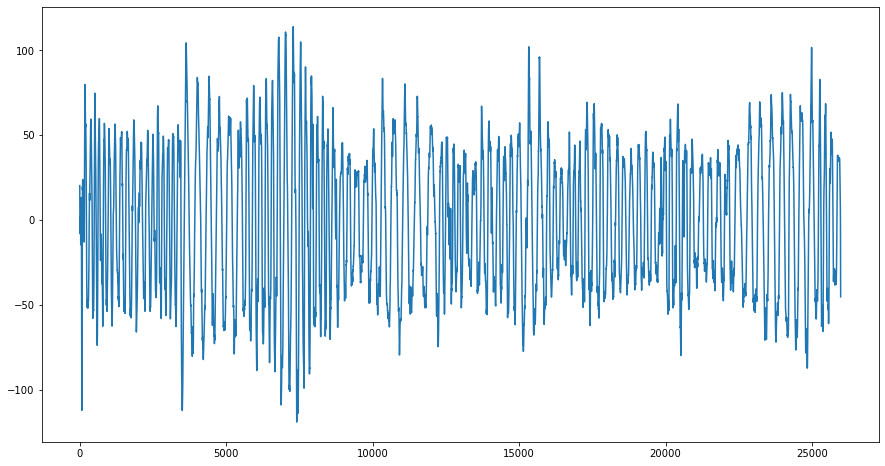

In [261]:
plt.plot(data_y[:, 4])

In [263]:
data_y[:, 4].std()

42.87602749718803

In [267]:
data_original = np.loadtxt('stride_x1.csv', delimiter=",")

In [269]:
data_original.shape

(3810, 1200)

In [271]:
np.transpose(data_original.reshape(3810, 6, 200), (0,2,1))

array([[[  7.6731 , -41.215  , -90.679  , -24.956  , -37.783  ,
          -3.8982 ],
        [  6.1175 , -42.164  , -90.785  , -26.864  , -36.062  ,
          -3.6911 ],
        [  6.3437 , -42.572  , -90.204  , -24.168  , -32.461  ,
          -3.6928 ],
        ...,
        [  3.6277 , -43.832  , -86.023  ,   4.344  ,   3.5395 ,
           5.6816 ],
        [  2.9015 , -44.31   , -85.888  ,   4.7947 ,   6.2003 ,
           5.144  ],
        [  2.0302 , -44.56   , -86.165  ,   4.0614 ,   7.4855 ,
           4.5001 ]],

       [[  5.6924 , -42.511  , -86.829  ,  12.247  ,  -0.4759 ,
          -1.5512 ],
        [  6.4723 , -43.54   , -86.415  ,  10.101  ,  -1.5246 ,
          -0.8059 ],
        [  6.7719 , -43.848  , -85.83   ,   6.2518 ,  -2.2386 ,
          -0.2779 ],
        ...,
        [  2.7338 , -43.351  , -88.801  ,   6.0999 , -11.381  ,
          -7.0974 ],
        [  2.0332 , -43.932  , -88.529  ,   5.0388 , -10.946  ,
          -7.6337 ],
        [  1.587  , -44.387  , -89.04

In [272]:
data_new = np.loadtxt('x.csv', delimiter=",")

In [289]:
len_draw = 30
start_seed = 0
traj_interval = 20
data_drawx = np.zeros((len_draw + 1, 200, 6))
data_drawy = np.zeros((len_draw + 1, 3))
for i_draw, i_data in enumerate(range(start_seed, start_seed + len_draw * traj_interval, traj_interval)):
#     data_drawx[i_draw + 1] = data_x[i_data]
    data_drawy[i_draw + 1] = data_drawy[i_draw] + data_y[i_data][4:7]

In [292]:
def draw_trajectory(gt_trajectory, pred_trajectory, figname):
    plt.rcParams['figure.figsize'] = [15, 10]
    fig, axs = plt.subplots(2, 3)
    axs[0, 0].plot(gt_trajectory[:,0])
    axs[0, 0].plot(pred_trajectory[:,0])
    axs[0, 0].set_title('X-t')
    axs[0, 1].plot(gt_trajectory[:,1])
    axs[0, 1].plot(pred_trajectory[:,1])
    axs[0, 1].set_title('Y-t')
    axs[0, 2].plot(gt_trajectory[:,2])
    axs[0, 2].plot(pred_trajectory[:,2])
    axs[0, 2].set_title('Z-t')
    axs[1, 0].plot(gt_trajectory[:,0], gt_trajectory[:,1])
    axs[1, 0].plot(pred_trajectory[:,0], pred_trajectory[:,1])
    axs[1, 0].set_title('X-Y')
    axs[1, 1].plot(gt_trajectory[:,1], gt_trajectory[:,2])
    axs[1, 1].plot(pred_trajectory[:,1], pred_trajectory[:,2])
    axs[1, 1].set_title('Y-Z')
    axs[1, 2].plot(gt_trajectory[:,0], gt_trajectory[:,2])
    axs[1, 2].plot(pred_trajectory[:,0], pred_trajectory[:,2])
    axs[1, 2].set_title('X-Z')
    fig.savefig(figname)
    

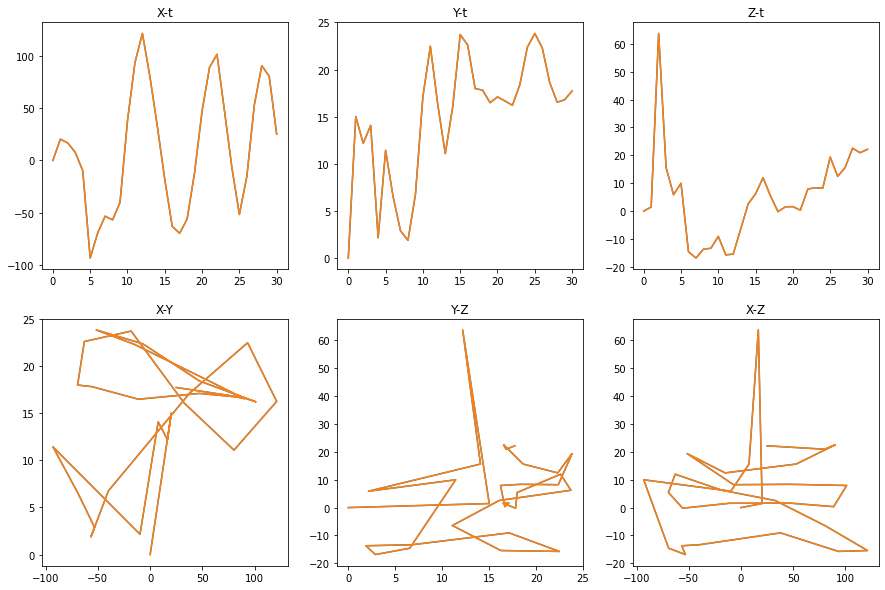

In [293]:
draw_trajectory(data_drawy, data_drawy, "test.jpg")

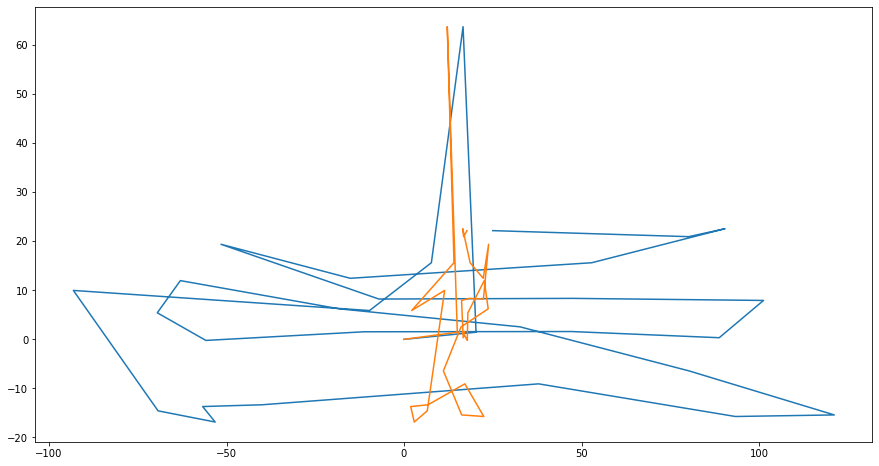

In [291]:
plt.plot(data_drawy[:,0], data_drawy[:,2])
plt.plot(data_drawy[:,1], data_drawy[:,2])

# Capture 1

In [142]:
a = Quaternion(8, 8, 8, 8)

In [143]:
b = [1,0,0]

In [144]:
a.rotate(b)

[0.0, 1.0, 0.0]